# Steps:
- Read an image file.
- The image file will consist of RGB layers. So, convert all RGB layers to each vector. The image will change from (m,n,p) to (m*n,p).
- Pick some number of centroids (Using Elbow Method) and then radomly initialize them.
- After that, give each of the pixel tuple to nearest centroid using Euclidean Distance.
- Now, we have got the centroids. The next task is to optimize the centroids.
- Take some number of epochs. Compute average of points in each cluster and then reinitialize the centroids to those average or mean points. 
- Again give each of the pixel tuple nearest centroid using Euclidean Distance.
- Repeat for those number of epochs.

In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/image.jpg


In [18]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [19]:
img=mpimg.imread('/kaggle/input/image.jpg')

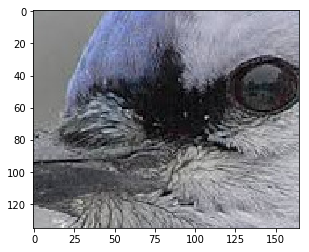

In [20]:
imgplot = plt.imshow(img)

In [21]:
img=img/255

In [22]:
img.shape

(135, 165, 3)

In [23]:
img_new=np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

In [24]:
m,n=img_new.shape

In [25]:
k=16 #Number of colors we are choosing out of the image to be compressed

In [26]:
centroids=np.zeros((k,n))

In [27]:
# random initialization of Centroids.  
for i in range(k): 
    centroids[i] = img_new[int(np.random.random(1)*1000)]

In [28]:
centroids

array([[0.56862745, 0.57647059, 0.57254902],
       [0.59215686, 0.65490196, 0.89019608],
       [0.56078431, 0.61568627, 0.80784314],
       [0.69019608, 0.69411765, 0.76470588],
       [0.55294118, 0.55294118, 0.55294118],
       [0.56078431, 0.56862745, 0.56470588],
       [0.55294118, 0.55294118, 0.55294118],
       [0.55294118, 0.56078431, 0.55686275],
       [0.58823529, 0.59607843, 0.65490196],
       [0.60392157, 0.65098039, 0.81568627],
       [0.45882353, 0.51764706, 0.68627451],
       [0.64313725, 0.65490196, 0.72156863],
       [0.54509804, 0.54509804, 0.54509804],
       [0.47843137, 0.49803922, 0.65490196],
       [0.67843137, 0.69019608, 0.75686275],
       [0.66666667, 0.67843137, 0.74509804]])

In [29]:
def distance(x1,y1,z1,x2,y2,z2): 
    dist = np.sqrt(np.square(x1 - x2) + np.square(y1 - y2)+np.square(z1 - z2))
    return dist 

In [30]:
def nearest_centroid(image,centroid):
    centroids_dictionary={}
    for i in range(image.shape[0]):
        dlist=[]
        for j in range(k):
            dlist.append(distance(image[i][0],image[i][1],image[i][2],centroid[j][0],centroid[j][1],centroid[j][2]))
        min_dist=np.argmin(dlist)
        centroids_dictionary[i]=min_dist   
    return centroids_dictionary

In [31]:
def optimize(image,centroid,iterations):
    centroid_dictionary = nearest_centroid(image,centroid)
    for lo in tqdm(range(iterations)):
        print('Epoch'+str(lo))
        for key,value in centroid_dictionary.items():
            s=np.zeros((3,))
            count=0
            for i in range(img_new.shape[0]):
                if centroid_dictionary[i]==value:
                    s=s+img_new[i]
                    count=count+1
            s=s/count
            centroids[value]=s
        centroid_dictionary = nearest_centroid(image,centroid)
    return centroid_dictionary

In [32]:
%%time
centroids_dictionary=optimize(img_new,centroids,3)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch0


 33%|███▎      | 1/3 [03:22<06:45, 202.90s/it]

Epoch1


 67%|██████▋   | 2/3 [05:35<03:01, 181.80s/it]

Epoch2


100%|██████████| 3/3 [07:32<00:00, 162.47s/it]

CPU times: user 7min 36s, sys: 1.12 s, total: 7min 38s
Wall time: 7min 36s


In [33]:
img_compressed=np.zeros(img_new.shape)

In [34]:
for key, value in centroids_dictionary.items():
    img_compressed[key]=centroids[value]

In [35]:
img_compressed.shape

(22275, 3)

In [36]:
img_final=img_compressed.reshape((135, 165, 3))

In [37]:
img_final.shape

(135, 165, 3)

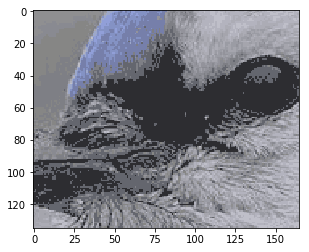

In [38]:
imgplot = plt.imshow(img_final)